In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.metrics import r2_score

In [9]:
# Reading csv file
data = pd.read_csv('USA_Housing.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [11]:
# Checking Duplicate values
data.duplicated().sum()

0

In [12]:
# Checking null values
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [13]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [14]:
# Data Claening
df = pd.DataFrame()
df['Income'] = data['Avg. Area Income'].round(2)
df['House Age'] = data['Avg. Area House Age'].apply(int)
df['No. of Rooms'] = data['Avg. Area Number of Rooms'].apply(int)
df['No. of Bedrooms'] = data['Avg. Area Number of Bedrooms'].apply(int)
df['Population'] = data['Area Population'].apply(int)
df['Price'] = data['Price'].apply(int)

In [15]:
df.head()

,Income,House Age,No. of Rooms,No. of Bedrooms,Population,Price
0,79545.46,5,7,4,23086,1059033
1,79248.64,6,6,3,40173,1505890
2,61287.07,5,8,5,36882,1058987
3,63345.24,7,5,3,34310,1260616
4,59982.20,5,7,4,26354,630943


In [16]:
plt.style.use('dark_background')

<Axes: xlabel='Price', ylabel='Density'>

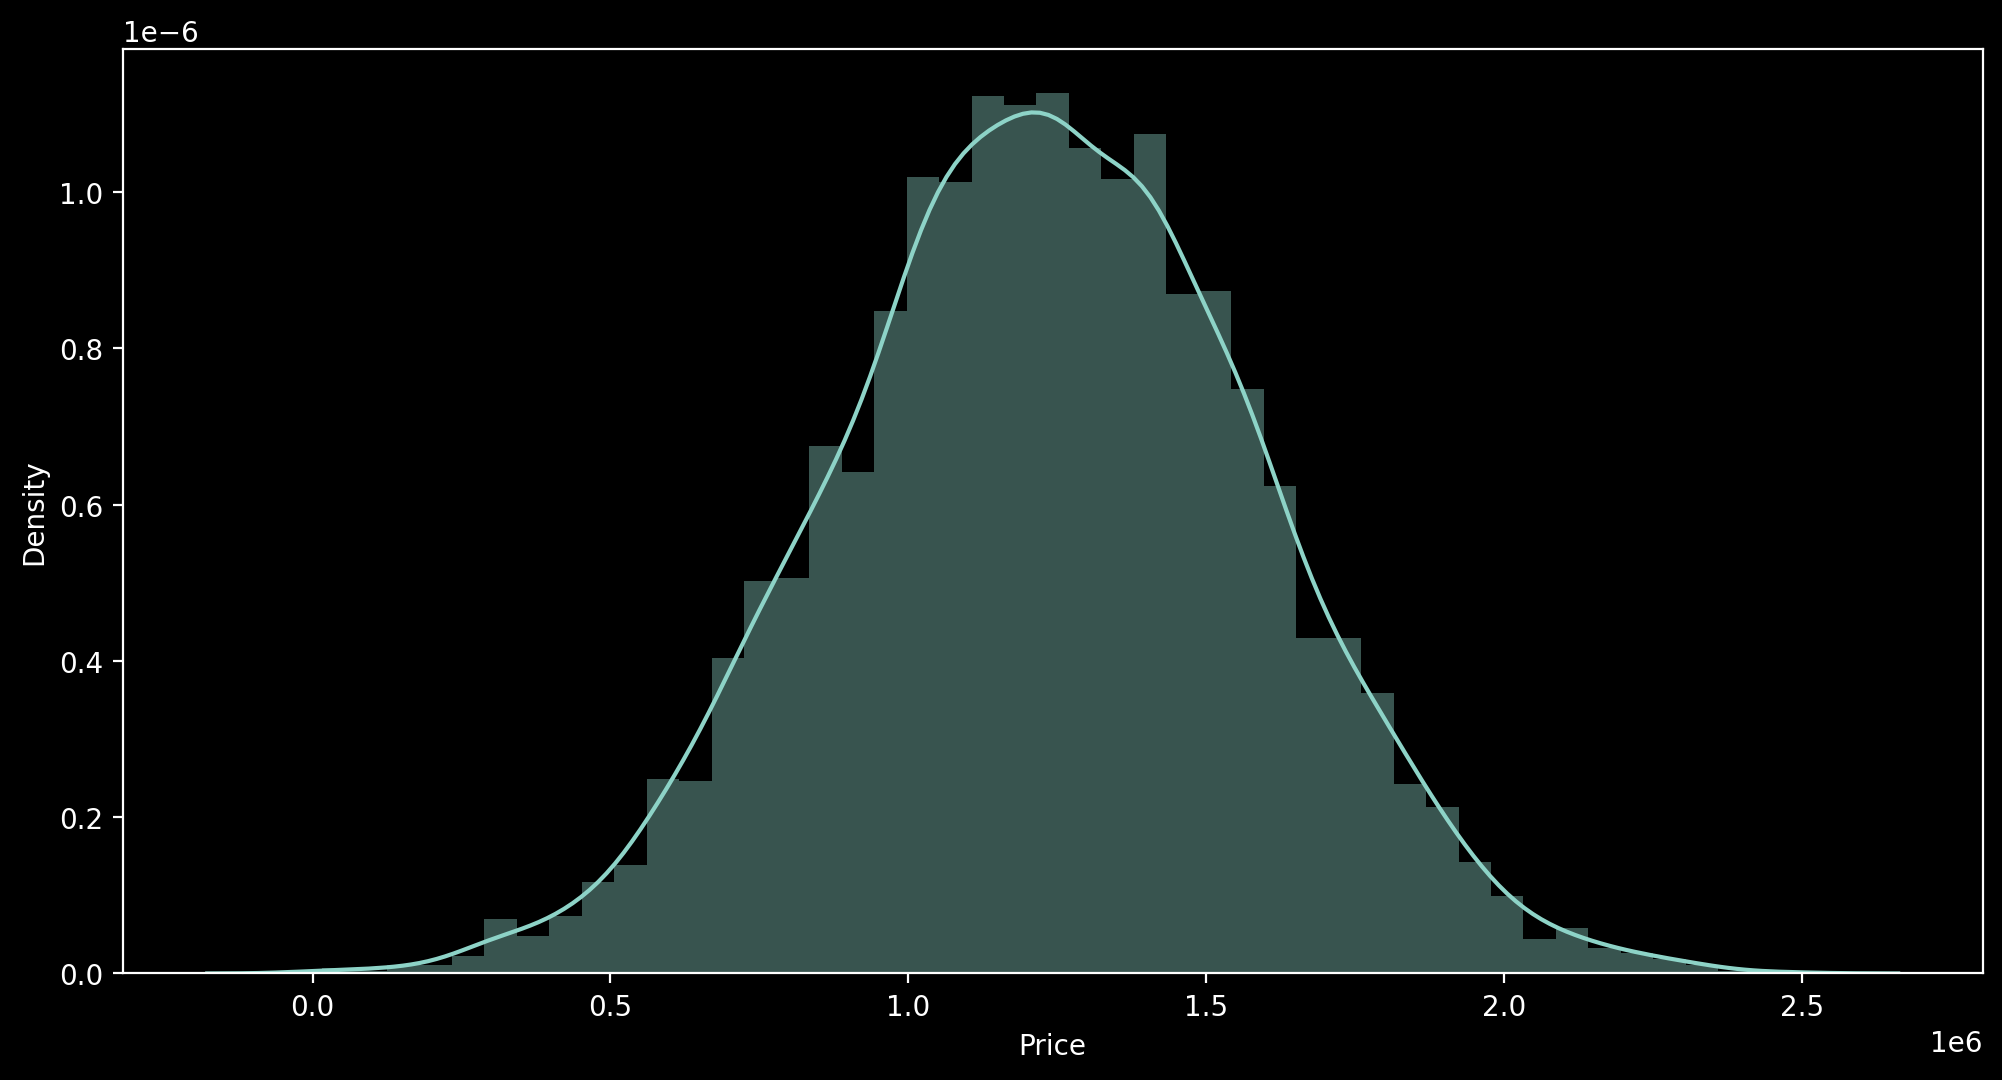

In [17]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.distplot(df.Price)

<Axes: xlabel='Income', ylabel='Price'>

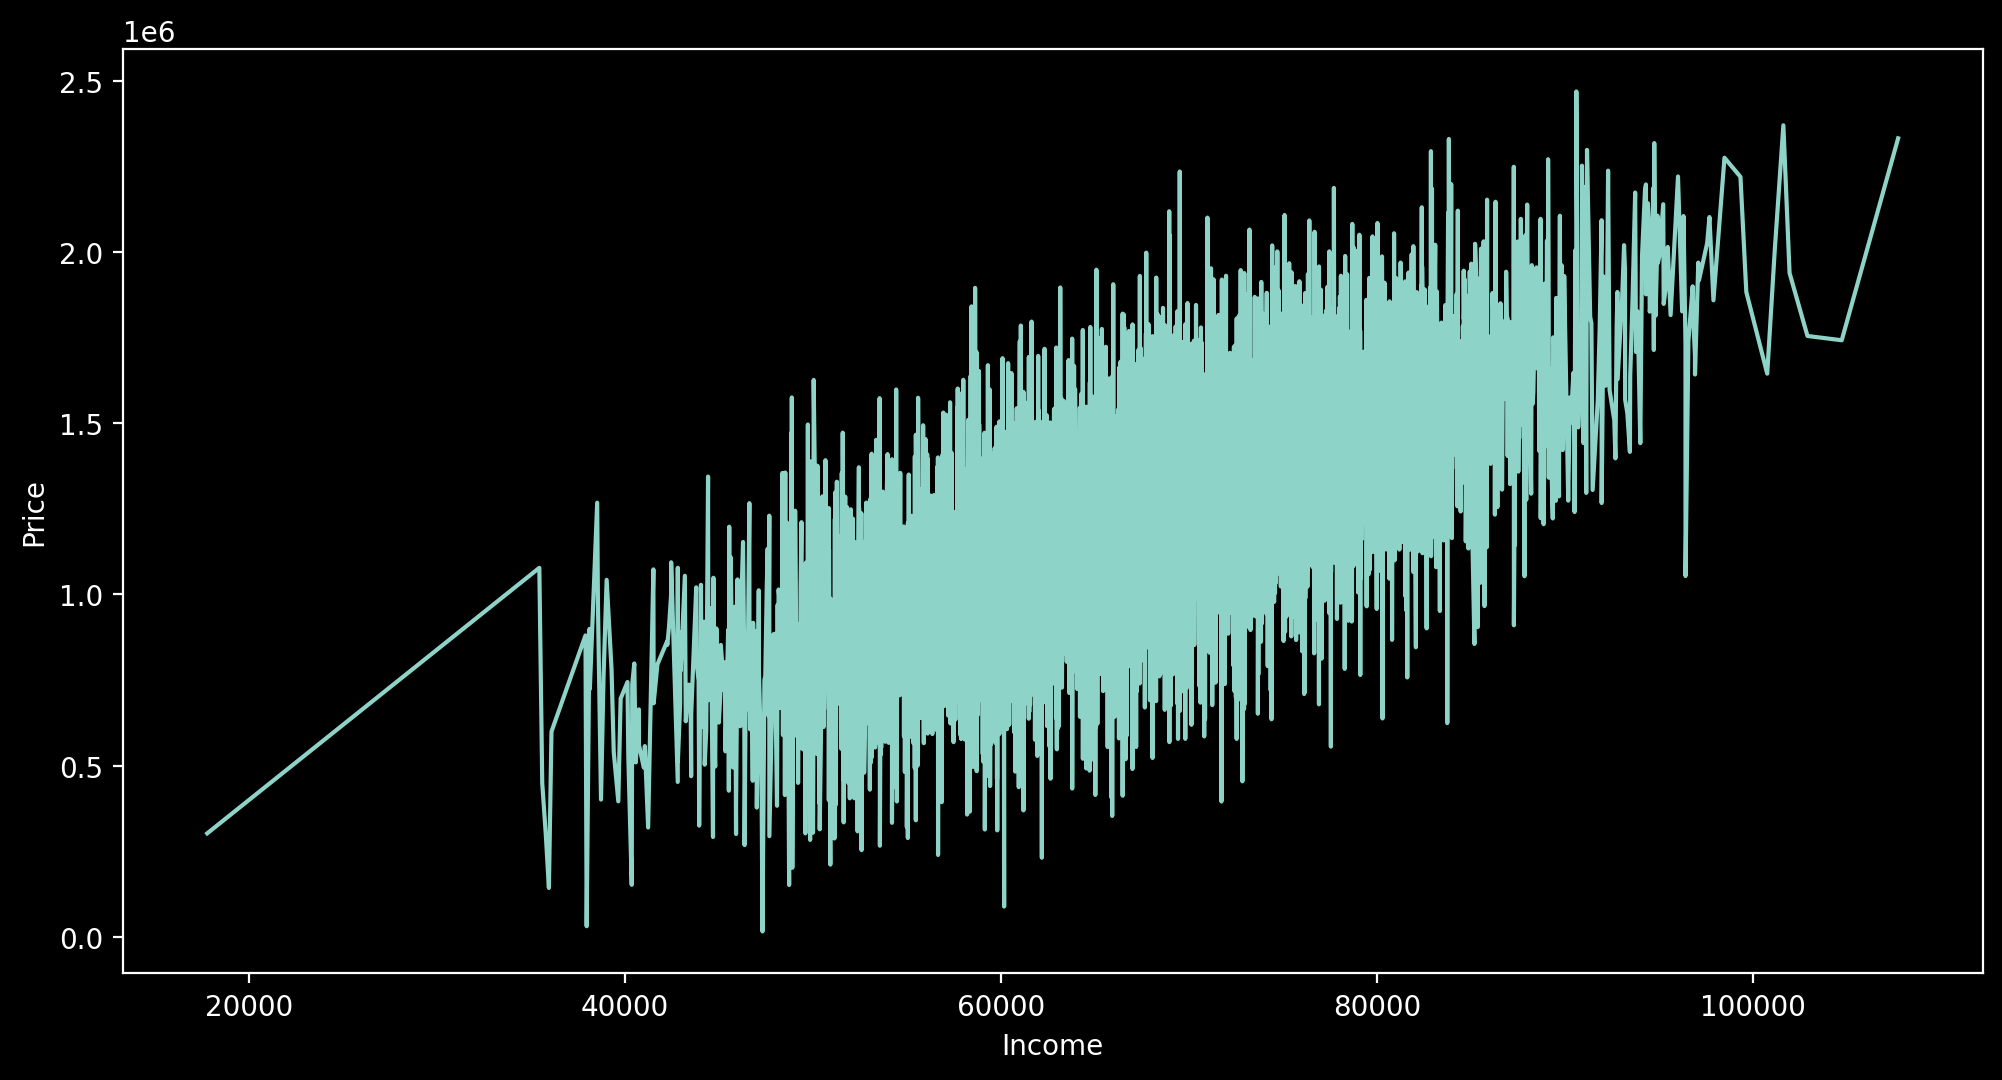

In [18]:
# Price wrt Income
plt.figure(figsize = (12, 6), dpi = 200)
sns.lineplot(x = 'Income', y = 'Price', data = df)

<Axes: xlabel='House Age', ylabel='Price'>

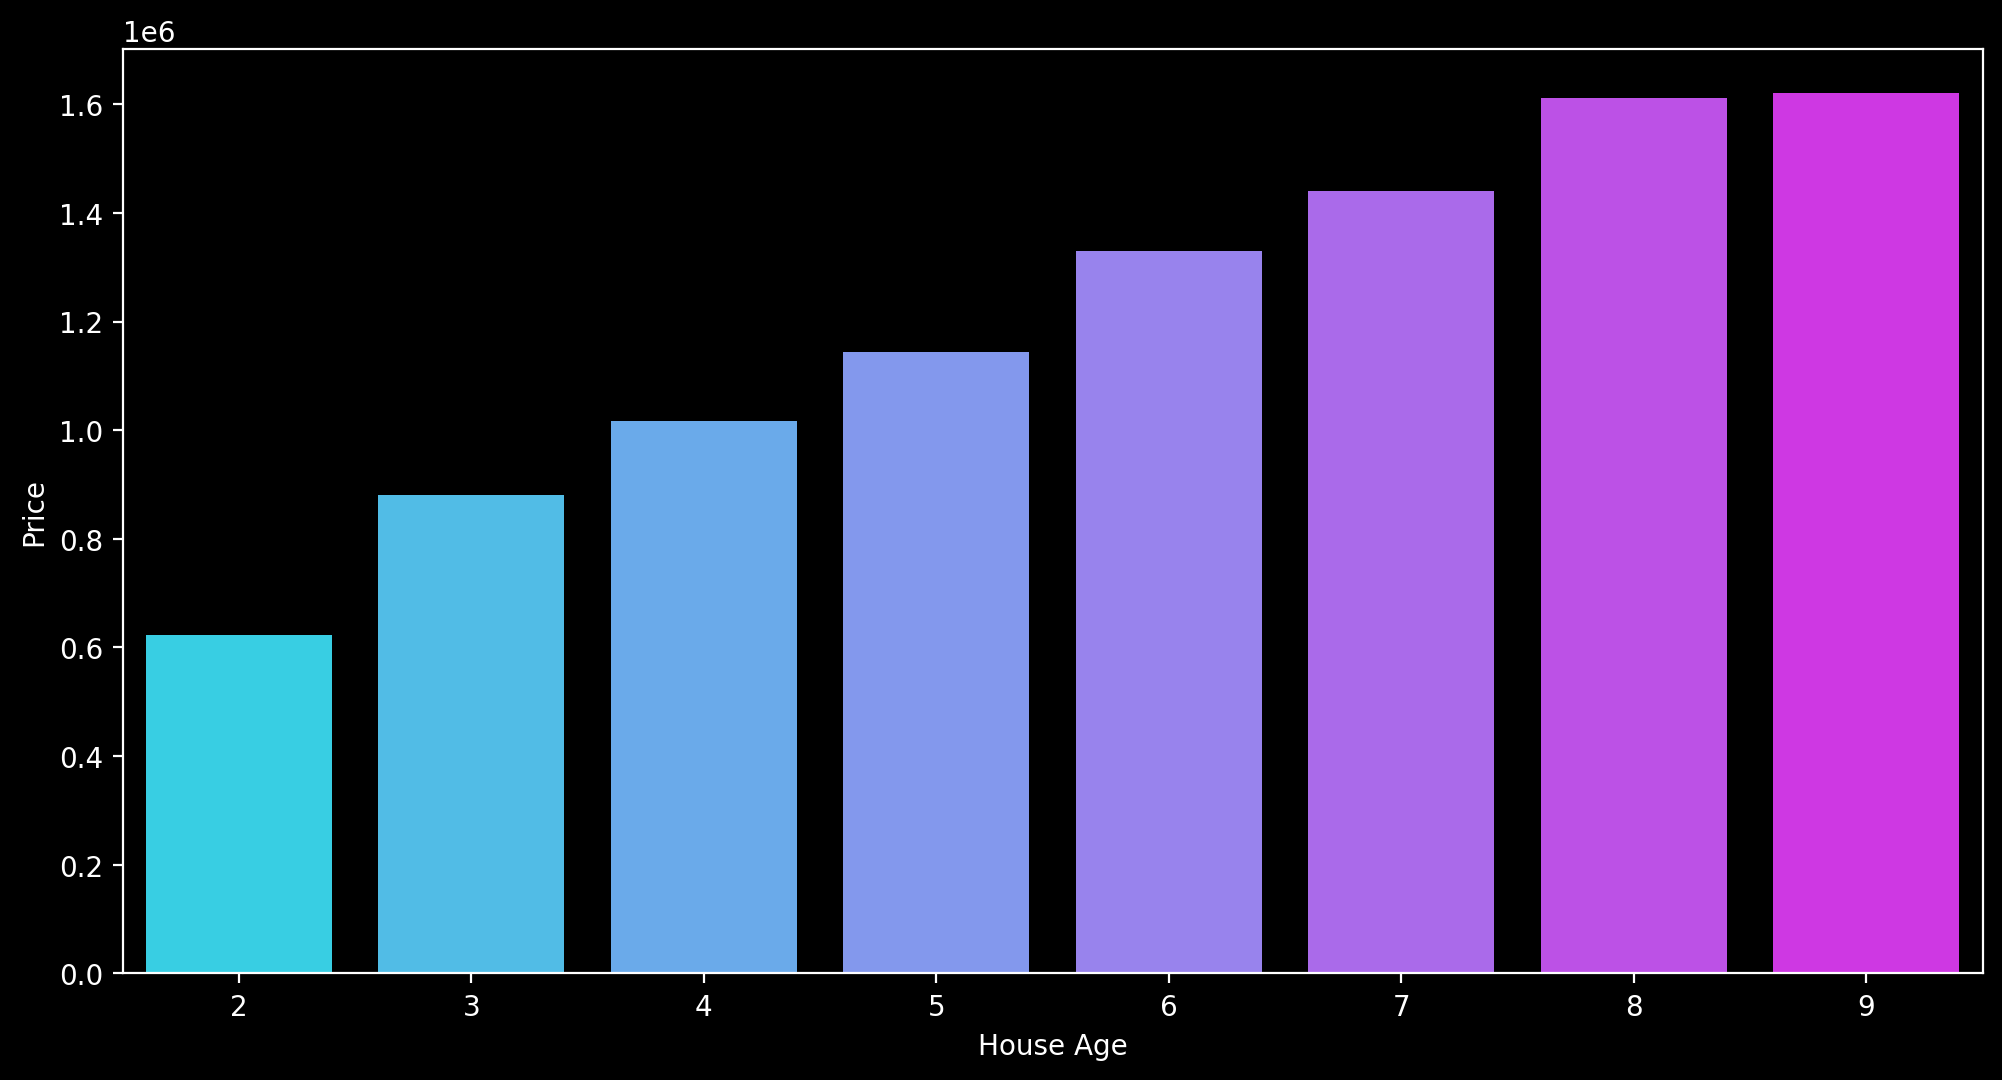

In [19]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'House Age', y = 'Price', data = df, palette = 'cool', ci = None)

<Axes: xlabel='No. of Rooms', ylabel='Price'>

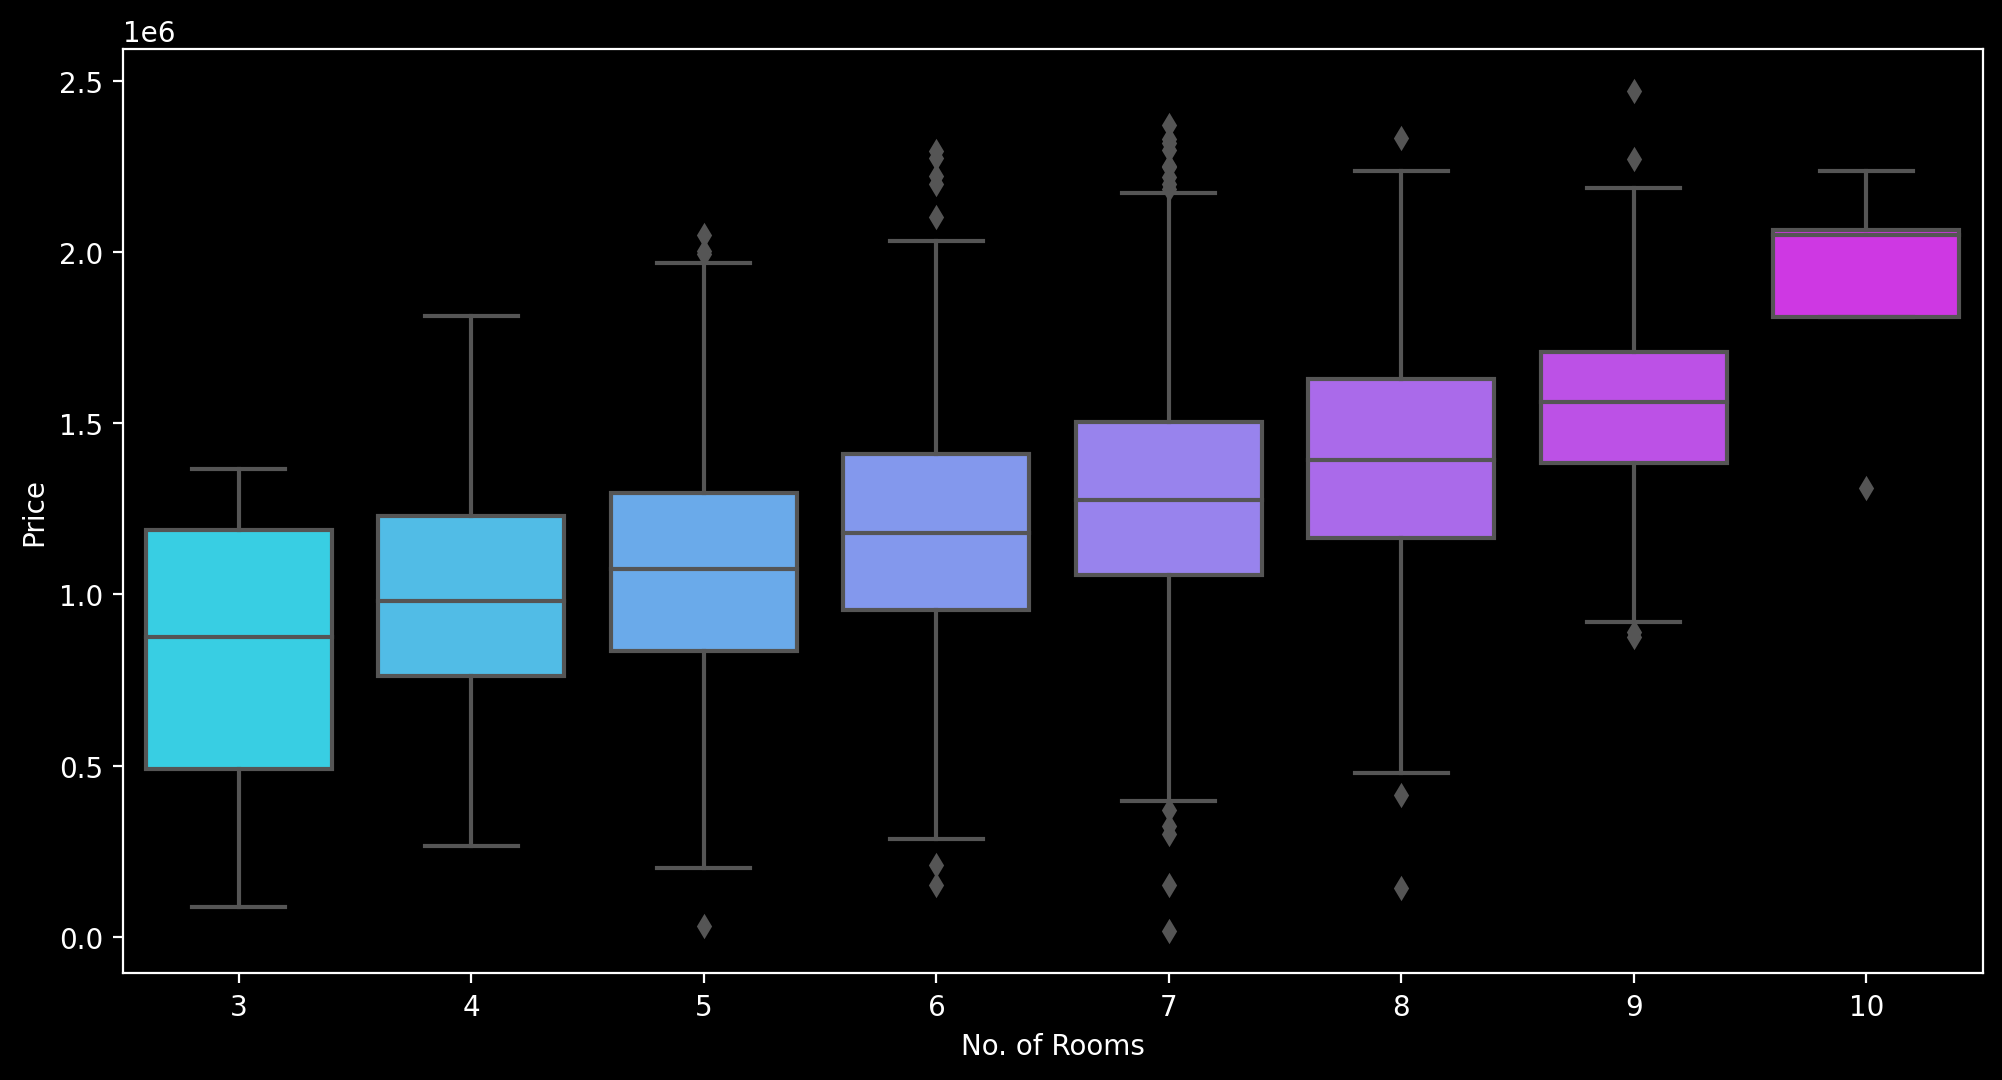

In [20]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.boxplot(x = 'No. of Rooms', y = 'Price', data = df, palette = 'cool')

<Axes: xlabel='No. of Bedrooms', ylabel='Price'>

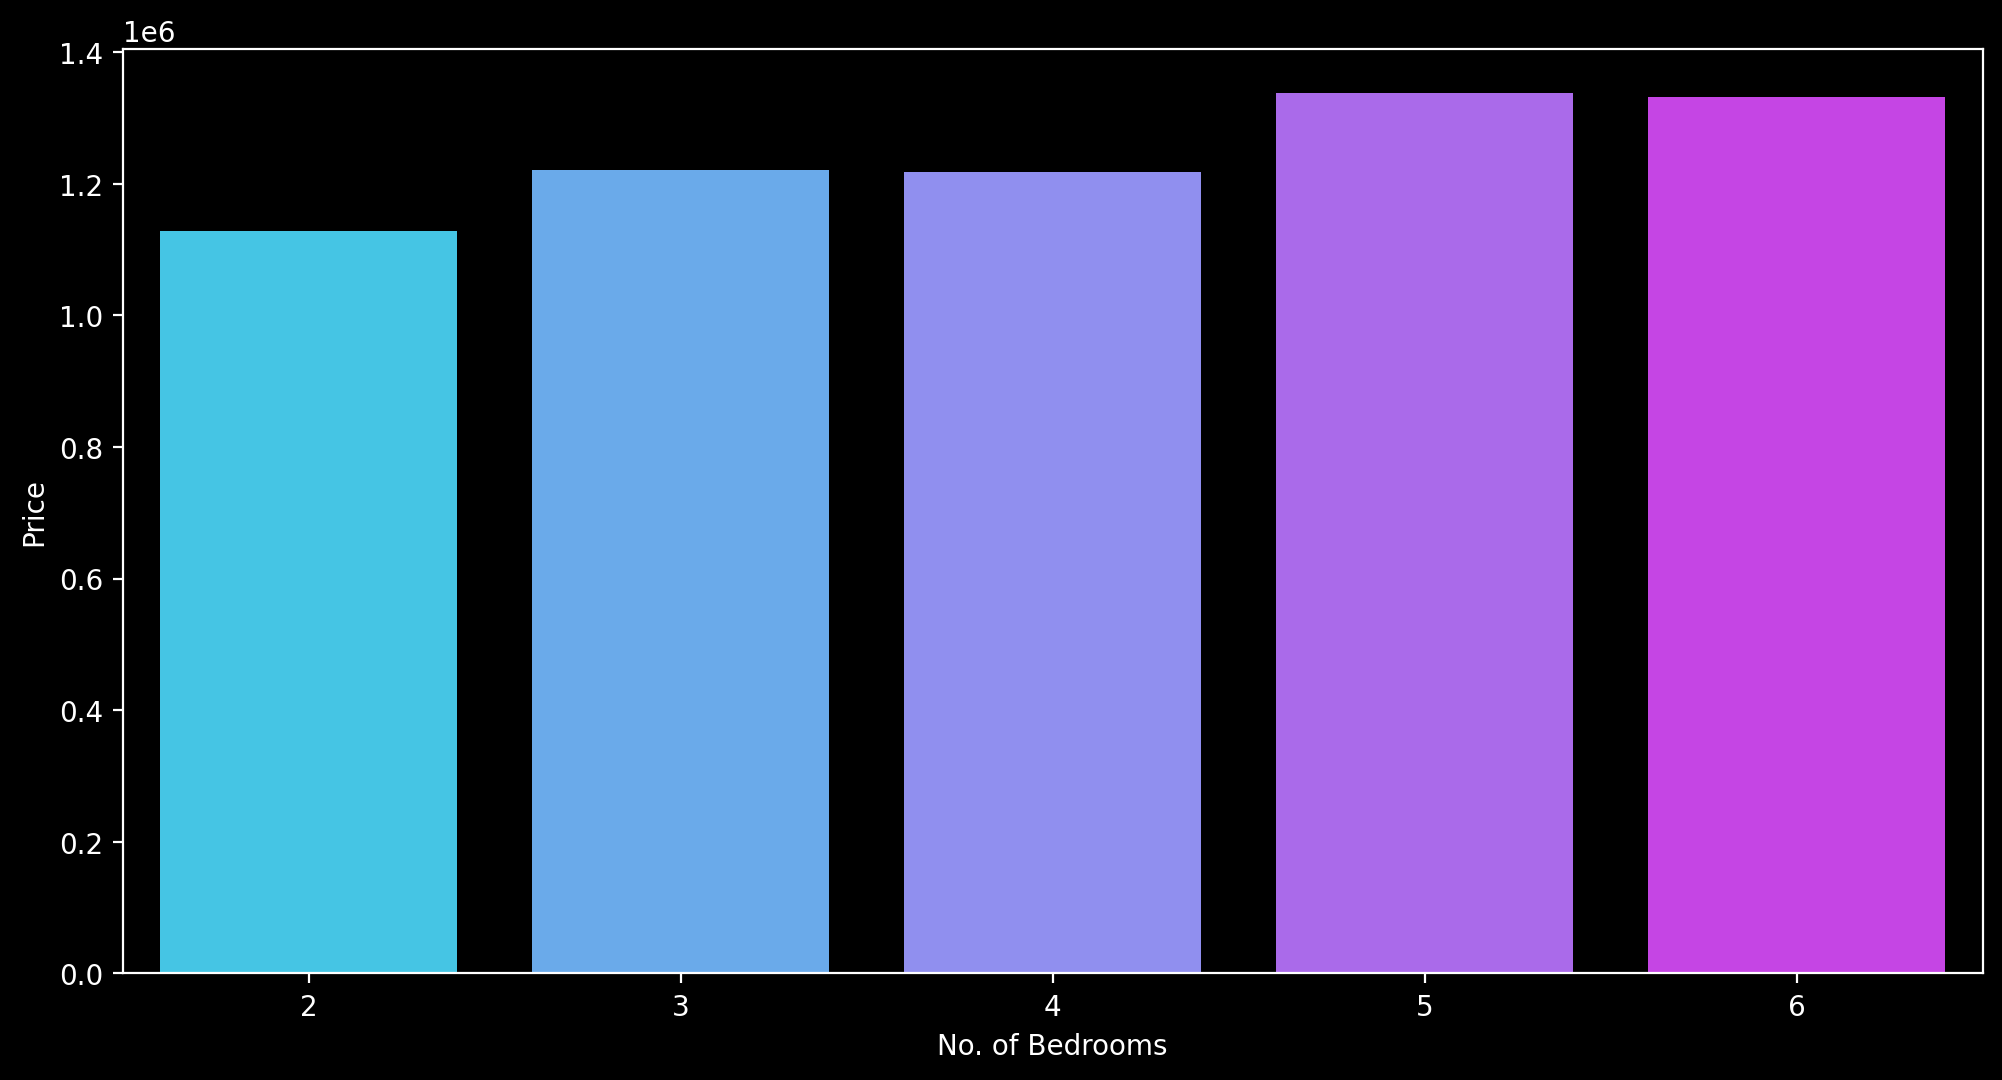

In [21]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'No. of Bedrooms', y = 'Price', data = df, palette = 'cool', ci = None)

<Axes: xlabel='Population', ylabel='Price'>

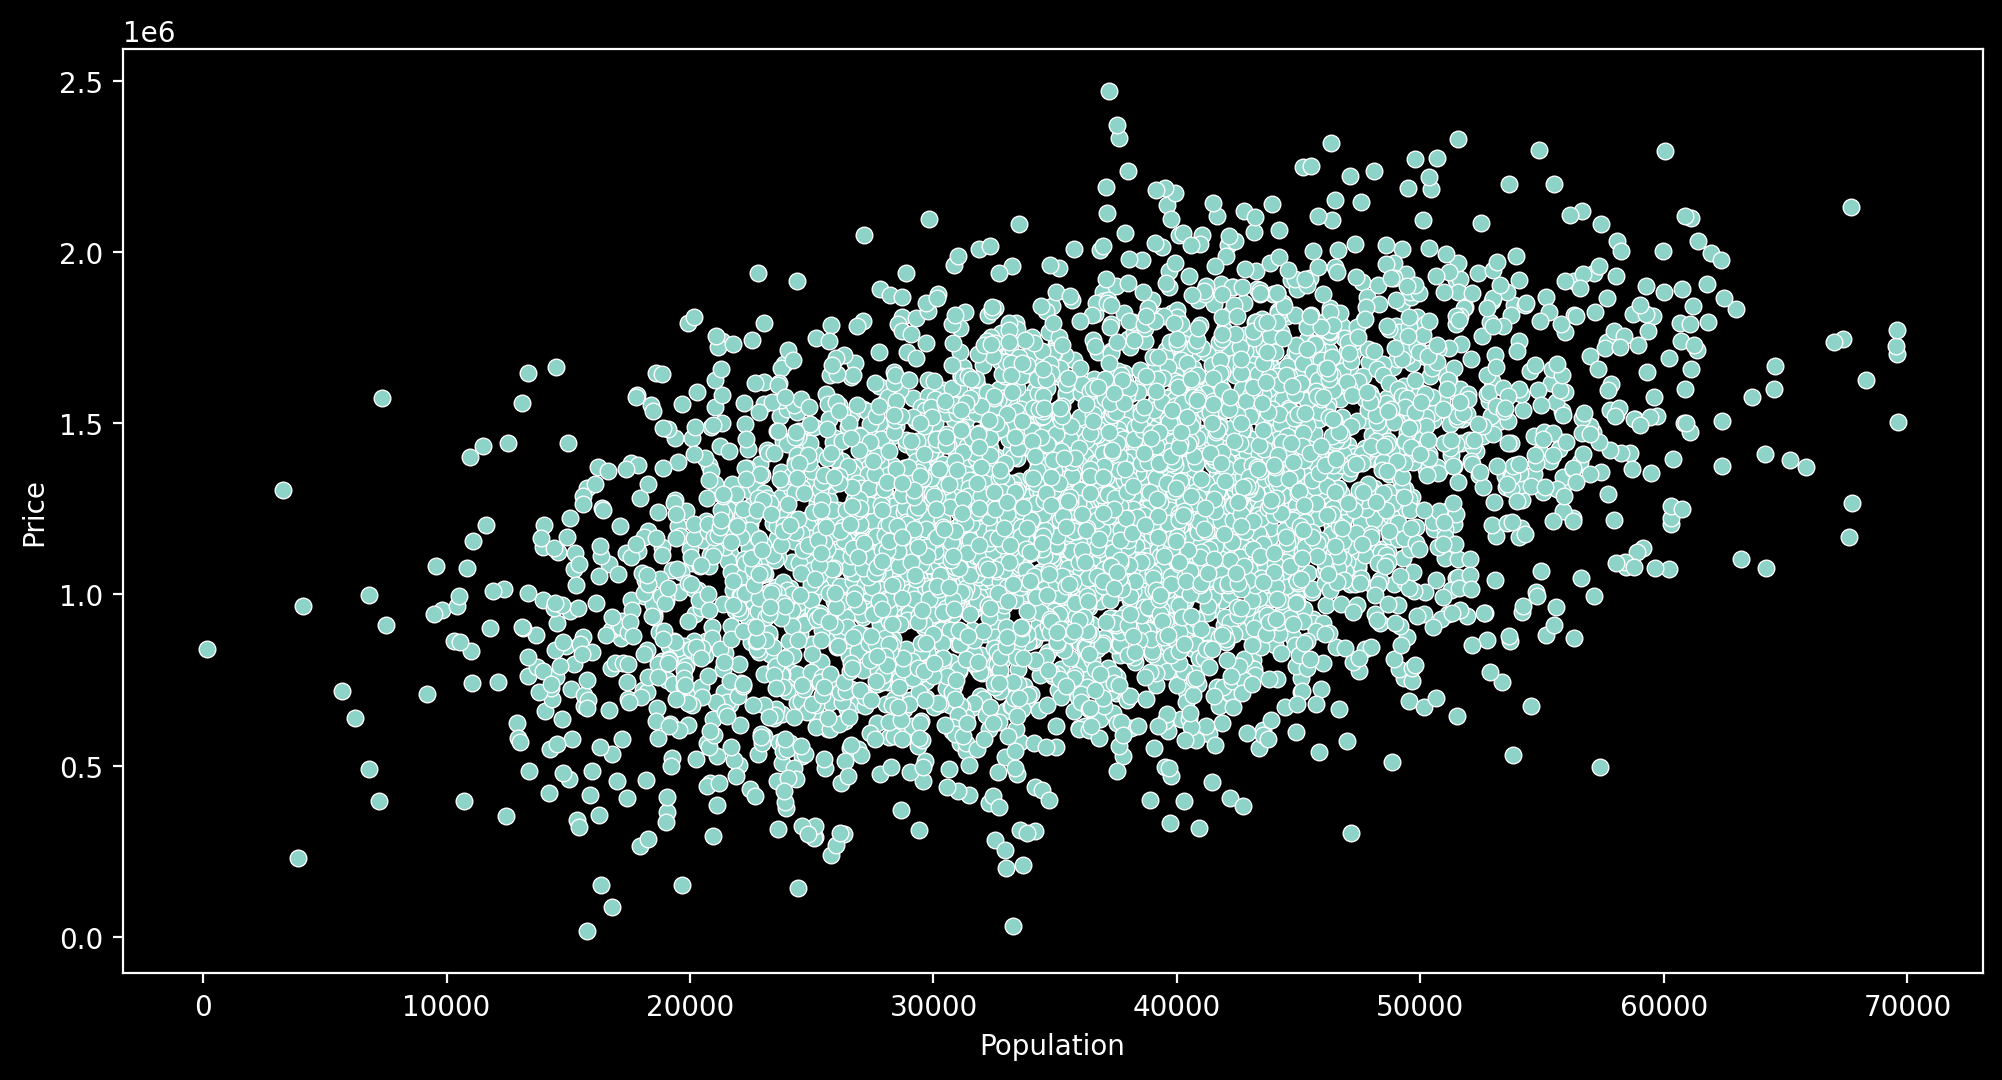

In [22]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.scatterplot(x = 'Population', y = 'Price', data = df)

<Axes: >

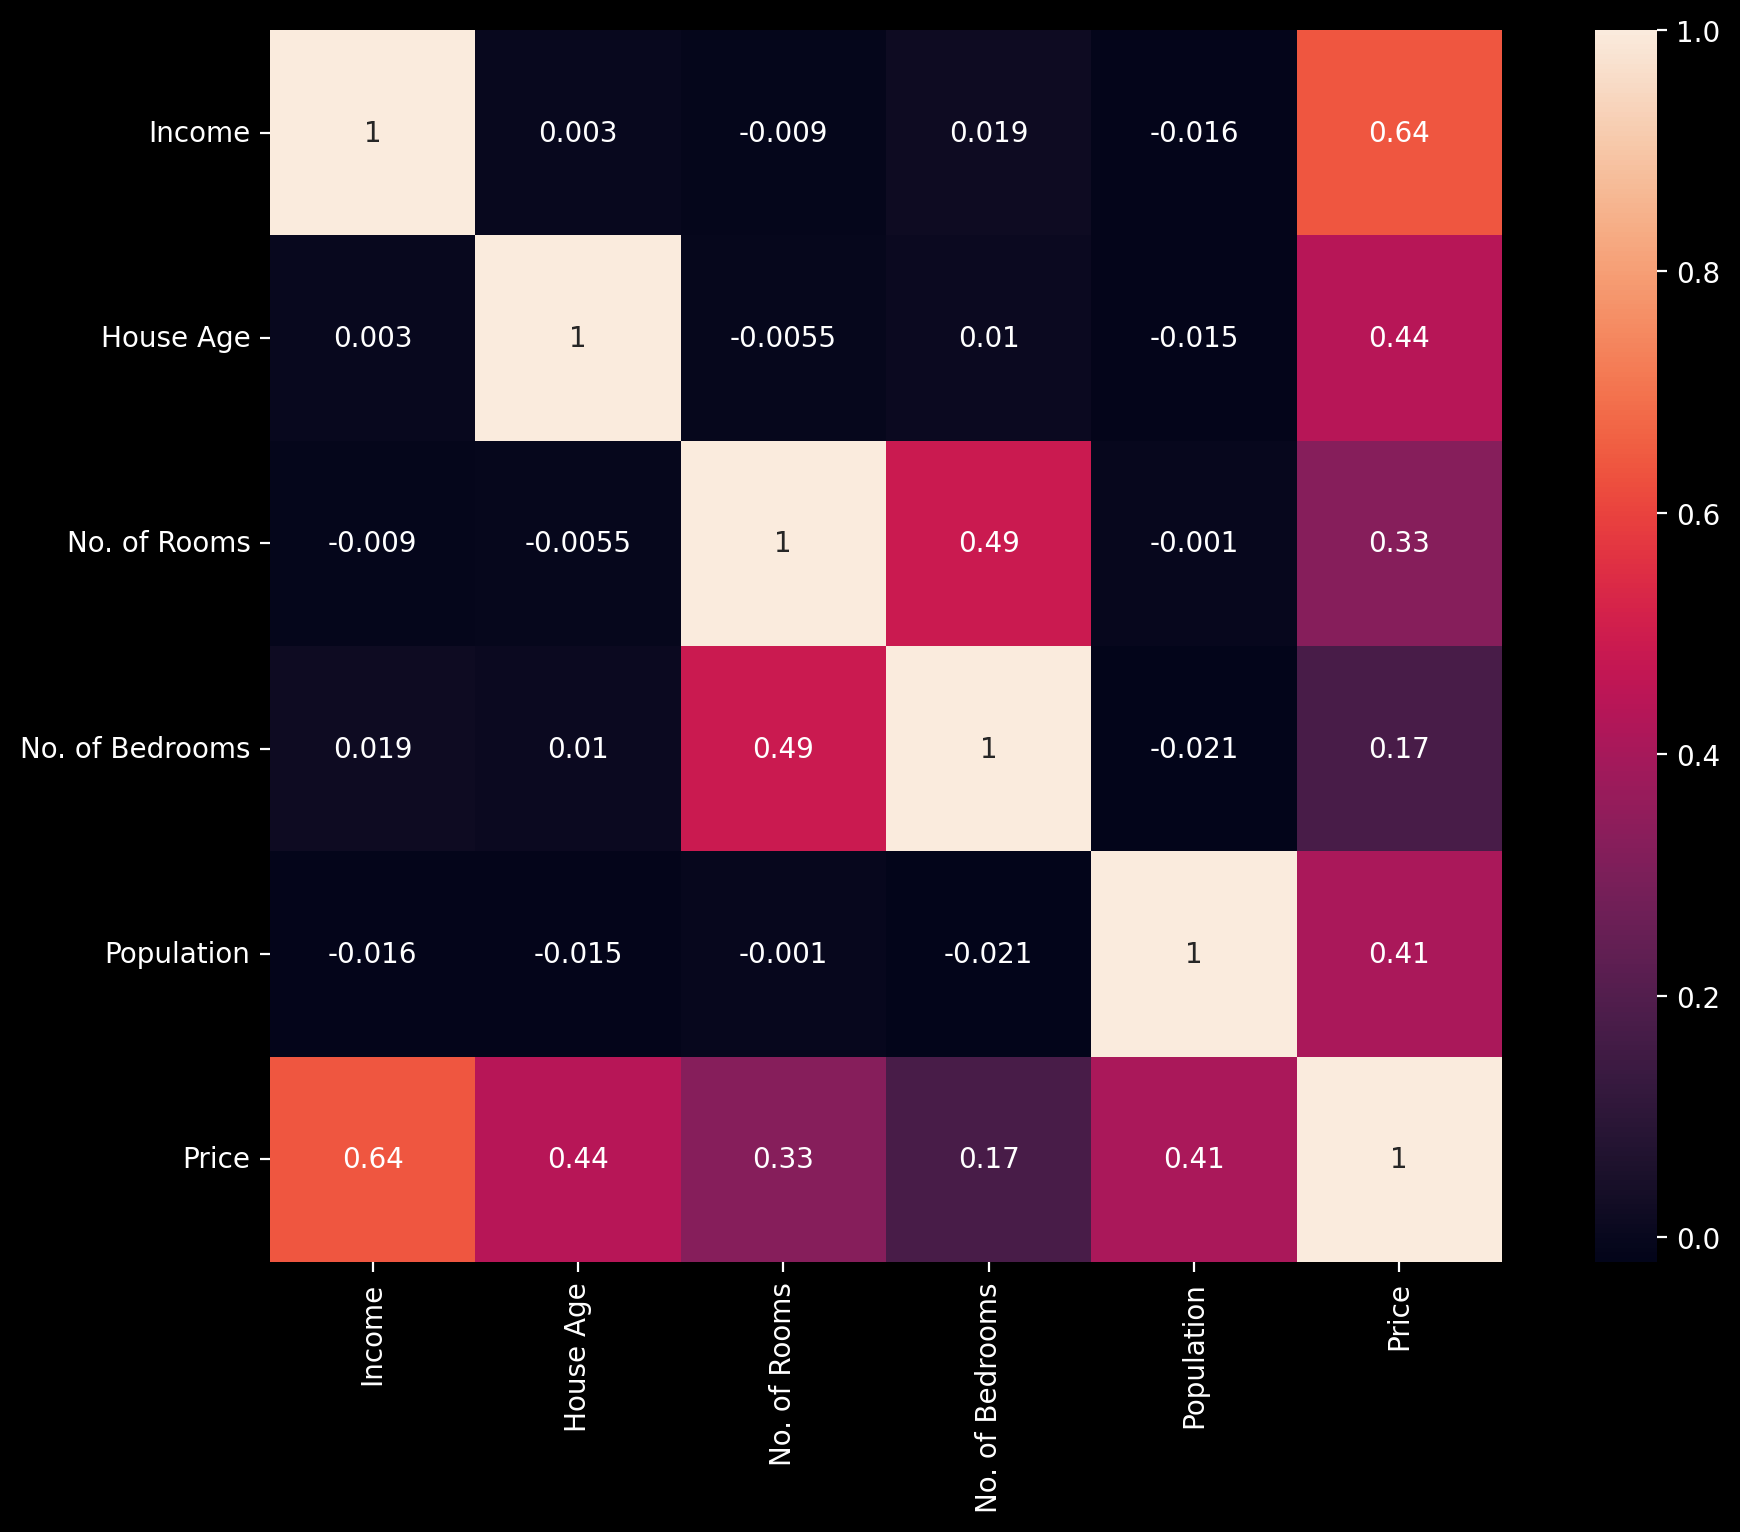

In [23]:
plt.figure(figsize = (12, 8), dpi = 200)
sns.heatmap(df.corr(), annot = True, square = True)

In [24]:
X = df.drop('Price', axis = 1)
Y = df['Price']

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [26]:
Y = df[['Price']].values
Y.shape

(5000, 1)

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .25, random_state = 42)

In [28]:
print('Training Data Set  : ', x_train.shape)
print('Training Label Set : ', y_train.shape)
print('Testing Data Set   : ', x_test.shape)
print('Testing Label Set  : ', y_test.shape)

Training Data Set  :  (3750, 5)
Training Label Set :  (3750, 1)
Testing Data Set   :  (1250, 5)
Testing Label Set  :  (1250, 1)


In [29]:
from sklearn.linear_model import LinearRegression
lr_regressor = LinearRegression()
lr_regressor.fit(x_train, y_train)

lr_pred_train = lr_regressor.predict(x_train)
lr_pred_test  = lr_regressor.predict(x_test)

print('Training Set Score : ', r2_score(y_train, lr_pred_train))
print('Testing Set Score  : ', r2_score(y_test, lr_pred_test))

Training Set Score :  0.8941034368167069
Testing Set Score  :  0.8886158823194968


In [30]:
from sklearn.linear_model import SGDRegressor
sg_regressor = SGDRegressor(alpha = 0.005)
sg_regressor.fit(x_train, y_train)

sg_pred_train = sg_regressor.predict(x_train)
sg_pred_test  = sg_regressor.predict(x_test)

print('Training Set Score : ', r2_score(y_train, sg_pred_train))
print('Testing Set Score  : ', r2_score(y_test, sg_pred_test))

Training Set Score :  0.8940392913842972
Testing Set Score  :  0.8886766851313279


In [31]:
sg_regressor.coef_

array([228244.30871167, 155751.17639829, 116192.69213548,   3339.59645352,
       149250.07878347])

In [32]:
sg_regressor.intercept_

array([1232108.97804221])

In [33]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
x_poly3_train = poly.fit_transform(x_train)
x_poly3_test = poly.fit_transform(x_test)

In [34]:
poly_reg3 = LinearRegression()
poly_reg3.fit(x_poly3_train, y_train)

poly3_pred_train = poly_reg3.predict(x_poly3_train)
poly3_pred_test  = poly_reg3.predict(x_poly3_test)

print('Training Set Score : ', r2_score(y_train, poly3_pred_train))
print('Testing Set Score  : ', r2_score(y_test, poly3_pred_test))

Training Set Score :  0.8943153906695089
Testing Set Score  :  0.8880119301896259


In [35]:
#Decision Trees
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(max_depth = 100, random_state = 100)
dt_regressor.fit(x_train, y_train)

dt_pred_train = dt_regressor.predict(x_train)
dt_pred_test  = dt_regressor.predict(x_test)

print('Training Set Score : ', r2_score(y_train, dt_pred_train))
print('Testing Set Score  : ', r2_score(y_test, dt_pred_test))

Training Set Score :  1.0
Testing Set Score  :  0.7157625063569156


In [36]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 1000, max_depth = 1000, random_state = 42)
rf_regressor.fit(x_train, y_train)

rf_pred_train = rf_regressor.predict(x_train)
rf_pred_test = rf_regressor.predict(x_test)

print('Training Set Score : ', r2_score(y_train, rf_pred_train))
print('Testing Set Score  : ', r2_score(y_test, rf_pred_test))

Training Set Score :  0.979757899439361
Testing Set Score  :  0.8445022918143625


In [38]:
#XGBOOST
from xgboost import XGBRegressor
xg_regressor = XGBRegressor(n_estimators = 1000, max_depth = 200, random_state = 42)
xg_regressor.fit(x_train, y_train)

xg_train_pred = xg_regressor.predict(x_train)
xg_test_pred = xg_regressor.predict(x_test)

print('Training set score : ', r2_score(y_train, xg_train_pred))
print('Testing set score  : ', r2_score(y_test, xg_test_pred))

Training set score :  0.9996520296901584
Testing set score  :  0.8119033506181642


In [39]:
#LIGHTGBM
from lightgbm import LGBMRegressor
lg_regressor = LGBMRegressor(n_estimators = 100)
lg_regressor.fit(x_train, y_train)

lg_train_pred = lg_regressor.predict(x_train)
lg_test_pred = lg_regressor.predict(x_test)

print('Training set score : ', r2_score(y_train, lg_train_pred))
print('Testing set score  : ', r2_score(y_test, lg_test_pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000509 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 534
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 5
[LightGBM] [Info] Start training from score 1229750.716000
Training set score :  0.924389685757219
Testing set score  :  0.8714430892295388


In [40]:
#Adaboost 
estimator = DecisionTreeRegressor(max_depth = 1000)

from sklearn.ensemble import AdaBoostRegressor
ad_regressor = AdaBoostRegressor(estimator, n_estimators = 500)
ad_regressor.fit(x_train, y_train)

ad_train_pred = ad_regressor.predict(x_train)
ad_test_pred = ad_regressor.predict(x_test)

print('Training set score : ', r2_score(y_train, ad_train_pred))
print('Testing set score  : ', r2_score(y_test, ad_test_pred))

Training set score :  0.9998427316495548
Testing set score  :  0.8281018011418964


In [41]:
from sklearn.ensemble import VotingRegressor
vt_regressor = VotingRegressor(estimators = [('lr', lr_regressor),
                                             ('sg', sg_regressor),
                                             ('po', poly_reg3),
                                               ('dt', dt_regressor),
                                               ('rf', rf_regressor),
                                               ('xg', xg_regressor),
                                               ('lg', lg_regressor),
                                               ('ad', ad_regressor)])

vt_regressor.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 534
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 5
[LightGBM] [Info] Start training from score 1229750.716000


VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('sg', SGDRegressor(alpha=0.005)),
                            ('po', LinearRegression()),
                            ('dt',
                             DecisionTreeRegressor(max_depth=100,
                                                   random_state=100)),
                            ('rf',
                             RandomForestRegressor(max_depth=1000,
                                                   n_estimators=1000,
                                                   random_state=42)),
                            ('xg',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_b...
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=200,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=1000, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...)),
                            ('lg', LGBMRegressor()),
                            ('ad',
                             AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=1000),
                                               n_estimators=500))])

In [42]:
vt_pred_train = vt_regressor.predict(x_train)
vt_pred_test = vt_regressor.predict(x_test)

print('Training Set Score :', r2_score(y_train, vt_pred_train))
print('Testing Set Score  :', r2_score(y_test, vt_pred_test))

Training Set Score : 0.9709032936677292
Testing Set Score  : 0.8705563875568512
